In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
sys.path.append("../")
from dataloaders.data_preprocessing import *
from general.utils import mkdir

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset generation

#### 1 covariate,  2 classes (0 & 1)

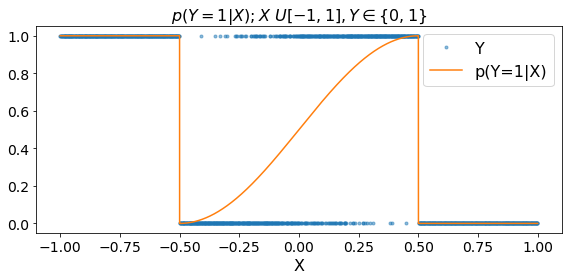

In [212]:
#define p(y=1|x)
np.random.seed(42)
x = np.random.uniform(-1,1,30000)
T = 2 # 2 for example
# T = 0.5
p_ycx = np.sin(2*(np.pi/T)*x)*0.5+0.5
p_ycx[x<=-T/4] = 1
p_ycx[x>=T/4] = 0

# p_ycx[x<=-3*T/4] = 0
# p_ycx[x>=3*T/4] = 1

y = np.random.binomial(1,p_ycx)

# p_ycx[x<=-3*T/4] = 1
# p_ycx[x>=3*T/4] = 0

plt.figure(figsize=(8,4))
plt.plot(np.sort(x)[::20],y[np.argsort(x)][::20],'.',label = 'Y',alpha = 0.5)
plt.plot(np.sort(x),p_ycx[np.argsort(x)],label = 'p(Y=1|X)')
plt.legend(fontsize=16)

plt.xlabel('X',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.ylabel('p(Y=1|X)',fontsize=16)
plt.title(r'$p(Y=1|X); X ~ U[-1,1], Y \in \{0,1\}$',fontsize=16)
plt.tight_layout()
# plt.savefig('synth.png',dpi = 500)
plt.show()

In [172]:
pd_data = pd.DataFrame()
pd_data['x'] = x
pd_data['y'] = y
print(pd_data.head())


save_dir = '/data/MLTdata/synthetic/dataset_processed/'
mkdir(save_dir)
pd_data.to_csv(save_dir + 'bpf_dataset_1covariate_2classes.csv',index = 0)

          x  y
0 -0.250920  0
1  0.901429  0
2  0.463988  1
3  0.197317  1
4 -0.687963  1


### Checking dataset splitting

In [95]:
from dataloaders.datasets import synthetic_pandas


train_df,test_df,cov_tags = synthetic_pandas(datatype='1d_2classes', utility='y',
                                               norm_std=True, seed=42,split = 1,n_splits=5)

 Split :  1  is loaded...
['train'] ['test']
------- Synthetic Dataset processing ---------- 
type :  <class 'type'>
utility :  y ; stratification_tags :  ['utility'] ; standarization :  True ; len(cov_tags) :  1
ntrain :  24000  ; ntest :  6000
check: overlap train and test ?  False



../dataloaders/datasets.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_train[c] = (pd_train[c].values - mean) / std
../dataloaders/datasets.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_test[c] = (pd_test[c].values - mean) / std


In [96]:
print('train : ', len(train_df), ' samples')
print(train_df.groupby(['strat'])['utility'].count() / len(train_df))
print()
print('test : ', len(test_df), ' samples')
print(test_df.groupby(['strat'])['utility'].count() / len(test_df))
print()

train_df.head()

train :  24000  samples
strat
0    0.499042
1    0.500958
Name: utility, dtype: float64

test :  6000  samples
strat
0    0.499167
1    0.500833
Name: utility, dtype: float64



,x,y,utility,sample_index,strat,dataset
0,-0.434282,0,0,0,0,train
1,1.566857,0,0,1,0,train
2,0.807209,1,1,2,1,train
3,0.344115,1,1,3,1,train
5,-1.193324,1,1,5,1,train


## BPF outputs

In [218]:
# !!!!!! train BPF models :: 
# ### Generate the python commands ##
# # run dataset corresponding preprocessing notebook before and update directories in dataloaders.datasets.py file

### UNCOMMENT FROM HERE :) !

# dataset = 'synth1d2c'
# basedir = '/data/natalia/models/'+dataset+'/BPF/'
# model_name_prefix = 'BPF_512_adam1e4_'

# ## optimizer
# optim = 'adam' #RMSprop
# lr=1e-4
# regweight = 0

# #Projector step
# eta = 5
# ## Network
# hlayers = '512x1'
# batchsize=128

# #dictionary with partition size tags and corresponding value
# rho_dic = {'005':0.05,'01':1e-1,'015':0.15, '02': 2e-1, '025':0.25,'03': 3e-1,
#            '035':0.35, '04': 4e-1,'045':0.45, '05': 5e-1, '055':0.55, '06':6e-1 ,
#            '065':0.65, '07':7e-1,'075':0.75, '08':8e-1, '085':0.85,
#            '09':9e-1 , '095':0.95, '1':1}
# #dictionary with lower bound tags and corresponding value
# epsilon_dic={'1e3':1e-3,'1e2':1e-2,'1e4':1e-4,'1e1':1e-1}


# games=300
# regression = False
# loss_list = ['CE']
# seed_list=[42]
# split_list = [1,2,3]  #change to one split if needed (split_list = [1])

# train = True
# gpu = 0

# epsilon_list = ['1e2']
# rho_list = ['005','01','02','03','04','05','06','07','08','09','1']

# for split in split_list:
#     for seed in seed_list:
#         for loss in loss_list:
#             for rho_str in rho_list:
#                 for epsilon_str in epsilon_list:
#                     epsilon = epsilon_dic[epsilon_str]
#                     rho = rho_dic[rho_str]

#                     out_file_ext = dataset + '_' + model_name_prefix + loss + '_seed' + str(seed) + '_split' + \
#                                    str(split) + 'rho' + rho_str + '_epsilon' + epsilon_str + '_verbose'

#                     model_name = model_name_prefix + loss + '_seed' + str(seed) + '_split' + \
#                                  str(split) + 'rho' + rho_str + '_epsilon' + epsilon_str
                    
#                     cmd = 'python main_BPF_tabular.py --basedir="{}" --dataset="{}" --model_name="{}"  --gpu={}'.format(basedir, dataset, model_name,gpu)

#                     cmd = cmd + ' --optim_regw={} --optim="{}" --lr={} --train={} '.format(regweight,optim,lr,train)
#                     cmd = cmd + ' --rho={} --epsilon={} --hlayers="{}" --games={} --seed={} --split={}'.format(rho, epsilon,hlayers,games, seed, split)
#                     cmd = cmd + ' --eta={} '.format(eta)
#                     cmd = cmd + ' --loss="{}" --regression={} --batch={} > {}.txt'.format(loss, regression, batchsize, out_file_ext)
#                     print(cmd)
#                     print()

python main_BPF_tabular.py --basedir="/data/natalia/models/synth1d2c/BPF/" --dataset="synth1d2c" --model_name="BPF_512_adam1e4_CE_seed42_split1rho005_epsilon1e2"  --gpu=0 --optim_regw=0 --optim="adam" --lr=0.0001 --train=True  --rho=0.05 --epsilon=0.01 --hlayers="512x1" --games=300 --seed=42 --split=1 --eta=5  --loss="CE" --regression=False --batch=128 > synth1d2c_BPF_512_adam1e4_CE_seed42_split1rho005_epsilon1e2_verbose.txt

python main_BPF_tabular.py --basedir="/data/natalia/models/synth1d2c/BPF/" --dataset="synth1d2c" --model_name="BPF_512_adam1e4_CE_seed42_split1rho01_epsilon1e2"  --gpu=0 --optim_regw=0 --optim="adam" --lr=0.0001 --train=True  --rho=0.1 --epsilon=0.01 --hlayers="512x1" --games=300 --seed=42 --split=1 --eta=5  --loss="CE" --regression=False --batch=128 > synth1d2c_BPF_512_adam1e4_CE_seed42_split1rho01_epsilon1e2_verbose.txt

python main_BPF_tabular.py --basedir="/data/natalia/models/synth1d2c/BPF/" --dataset="synth1d2c" --model_name="BPF_512_adam1e4_CE_seed42_split1

#### Load results

In [184]:
dataset = 'synth1d2c'
basedir = '/data/natalia/models/'+dataset+'/BPF/'
model_name_prefix = 'BPF_512_adam1e4_'

seed = 42
loss = 'CE'

epsilon_list = ['1e2']
rho_list = ['005','01','02','03','04','05','06','07','08','09','1']
split_list = [1,2,3]
nofiles_list = []

pd_summary = None
for rho_str in rho_list:
    for epsilon_str in epsilon_list:
        for split in split_list:
            model_name = model_name_prefix + loss + '_seed' + str(seed) + '_split' + \
                                     str(split) + 'rho' + rho_str + '_epsilon' + epsilon_str
            if os.path.exists(basedir+model_name+'/summary_performance.csv'):
                pd_summary_ix = pd.read_csv(basedir+model_name+'/summary_performance.csv')
                if pd_summary is None:
                    pd_summary = pd_summary_ix.copy()
                else:
                    pd_summary = pd.concat([pd_summary,pd_summary_ix],axis = 0)
                print(' load: ',model_name)
            else:
                nofiles_list.append(model_name)

if len(nofiles_list)>0:
    print('### ')
    print('Not found files : !!!!!!! ')
    for file in nofiles_list:
        print(file)

 load:  BPF_512_adam1e4_CE_seed42_split1rho005_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split2rho005_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split3rho005_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split1rho01_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split2rho01_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split3rho01_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split1rho02_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split2rho02_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split3rho02_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split1rho03_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split2rho03_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split3rho03_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split1rho04_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split2rho04_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split3rho04_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split1rho05_epsilon1e2
 load:  BPF_512_adam1e4_CE_seed42_split2rho05_epsilon1e2
 load:  BPF_512_adam1e4_CE_s

In [185]:
from general.evaluation import get_best_model

## Best BPF for each partition rho
pd_out = get_best_model(pd_summary, model_tag='rho_model', dataset_choice=['val'], precision=3)
pd_out['model'] = 'BPF'

## Baseline
pd_baseline = get_best_model(pd_summary.loc[pd_summary['rho_model'] == 1], model_tag='rho_model',
                                            dataset_choice=['val'], precision=3) 
pd_baseline['model'] = 'Baseline'
pd_out = pd.concat([pd_out,pd_baseline])

## DRO Outputs

In [219]:
# !!!!! train DRO models :: 
# ### Generate the python commands ##
# # run dataset corresponding preprocessing notebook before and update directories in dataloaders.datasets.py file

### UNCOMMENT FROM HERE :) !

# dataset = 'synth1d2c'
# basedir = '/data/natalia/models/'+dataset+'/DRO/'
# model_name_prefix = 'DRO_512_adam1e4_'

# ## optimizer
# optim = 'adam' #RMSprop
# lr=1e-4
# regweight = 0

# #Projector step
# eta = 5
# ## Network
# hlayers = '512x1'
# batchsize=128

# #dictionary with DRO eta parameter tags and corresponding value
# eta_dic={'0':0, '1':1,'01':0.1, '02':0.2, '03':0.3, '04':0.4, '05':0.5, '06':0.6,  '07':0.7, '08':0.8, '09':0.9, '005':0.05, '015':0.15, '025':0.25, '035':0.35, '045':0.45,
#          '055':0.55, '065':0.65,  '075':0.75, '085':0.85, '095':0.95}


# epochs=300
# regression = False
# loss_list = ['CE']
# seed_list=[42]
# split_list = [1,2,3]  #change to one split if needed (split_list = [1])

# train = True
# gpu = 0

# eta_list = ['0','01','02','03','04','05','06','07','08','09','1']

# for split in split_list:
#     for seed in seed_list:
#         for loss in loss_list:
#             for eta_str in eta_list:
#                 eta = eta_dic[eta_str]

#                 out_file_ext = dataset + '_' + model_name_prefix + loss + '_seed' + str(seed) + '_split' + \
#                                str(split) + '_eta' + eta_str + '_verbose'

#                 model_name = model_name_prefix + loss + '_seed' + str(seed) + '_split' + \
#                              str(split) + '_eta' + eta_str

#                 cmd = 'python main_DRO_tabular.py --basedir="{}" --dataset="{}" --model_name="{}"  --gpu={}'.format(basedir, dataset, model_name,gpu)

#                 cmd = cmd + ' --optim_regw={} --optim="{}" --lr={} --train={} '.format(regweight, optim, lr,train)
#                 cmd = cmd + ' --eta={} --hlayers="{}" --epochs={} --seed={} --split={}'.format( eta, hlayers, epochs, seed, split)
#                 cmd = cmd + ' --loss="{}" --regression={} --batch={} > {}.txt'.format(loss, regression, batchsize, out_file_ext)

#                 print(cmd)
#                 print()

python main_DRO_tabular.py --basedir="/data/natalia/models/synth1d2c/DRO/" --dataset="synth1d2c" --model_name="DRO_512_adam1e4_CE_seed42_split1_eta0"  --gpu=0 --optim_regw=0 --optim="adam" --lr=0.0001 --train=True  --eta=0 --hlayers="512x1" --epochs=300 --seed=42 --split=1 --loss="CE" --regression=False --batch=128 > synth1d2c_DRO_512_adam1e4_CE_seed42_split1_eta0_verbose.txt

python main_DRO_tabular.py --basedir="/data/natalia/models/synth1d2c/DRO/" --dataset="synth1d2c" --model_name="DRO_512_adam1e4_CE_seed42_split1_eta01"  --gpu=0 --optim_regw=0 --optim="adam" --lr=0.0001 --train=True  --eta=0.1 --hlayers="512x1" --epochs=300 --seed=42 --split=1 --loss="CE" --regression=False --batch=128 > synth1d2c_DRO_512_adam1e4_CE_seed42_split1_eta01_verbose.txt

python main_DRO_tabular.py --basedir="/data/natalia/models/synth1d2c/DRO/" --dataset="synth1d2c" --model_name="DRO_512_adam1e4_CE_seed42_split1_eta02"  --gpu=0 --optim_regw=0 --optim="adam" --lr=0.0001 --train=True  --eta=0.2 --hlayers=

#### Load results

In [186]:
basedir = '/data/natalia/models/'+dataset+'/DRO/'
model_name_prefix = 'DRO_512_adam1e4_'

seed = 42
loss = 'CE'
eta_list = ['0','01','02','03','04','05','06','07','08','09','1']
split_list = [1,2,3]
nofiles_list = []

pd_summary = None
for eta_str in eta_list:
    for split in split_list:
        model_name = model_name_prefix + loss + '_seed' + str(seed) + '_split' + \
                                 str(split) + '_eta' + eta_str
        
        if os.path.exists(basedir+model_name+'/summary_performance.csv'):
            pd_summary_ix = pd.read_csv(basedir+model_name+'/summary_performance.csv')
            if pd_summary is None:
                pd_summary = pd_summary_ix.copy()
            else:
                pd_summary = pd.concat([pd_summary,pd_summary_ix],axis = 0)

            print(' load: ',model_name)

        else:
            nofiles_list.append(model_name)

if len(nofiles_list)>0:
    print('### ')
    print('Not found files : !!!!!!! ')
    for file in nofiles_list:
        print(file)

 load:  DRO_512_adam1e4_CE_seed42_split1_eta0
 load:  DRO_512_adam1e4_CE_seed42_split2_eta0
 load:  DRO_512_adam1e4_CE_seed42_split3_eta0
 load:  DRO_512_adam1e4_CE_seed42_split1_eta01
 load:  DRO_512_adam1e4_CE_seed42_split2_eta01
 load:  DRO_512_adam1e4_CE_seed42_split3_eta01
 load:  DRO_512_adam1e4_CE_seed42_split1_eta02
 load:  DRO_512_adam1e4_CE_seed42_split2_eta02
 load:  DRO_512_adam1e4_CE_seed42_split3_eta02
 load:  DRO_512_adam1e4_CE_seed42_split1_eta03
 load:  DRO_512_adam1e4_CE_seed42_split2_eta03
 load:  DRO_512_adam1e4_CE_seed42_split3_eta03
 load:  DRO_512_adam1e4_CE_seed42_split1_eta04
 load:  DRO_512_adam1e4_CE_seed42_split2_eta04
 load:  DRO_512_adam1e4_CE_seed42_split3_eta04
 load:  DRO_512_adam1e4_CE_seed42_split1_eta05
 load:  DRO_512_adam1e4_CE_seed42_split2_eta05
 load:  DRO_512_adam1e4_CE_seed42_split3_eta05
 load:  DRO_512_adam1e4_CE_seed42_split1_eta06
 load:  DRO_512_adam1e4_CE_seed42_split2_eta06
 load:  DRO_512_adam1e4_CE_seed42_split3_eta06
 load:  DRO_512_

In [187]:
pd_DRO = get_best_model(pd_summary, model_tag='eta', dataset_choice=['val'], precision=3)
pd_DRO['model'] = 'DRO'
pd_out = pd.concat([pd_out,pd_DRO])

ce


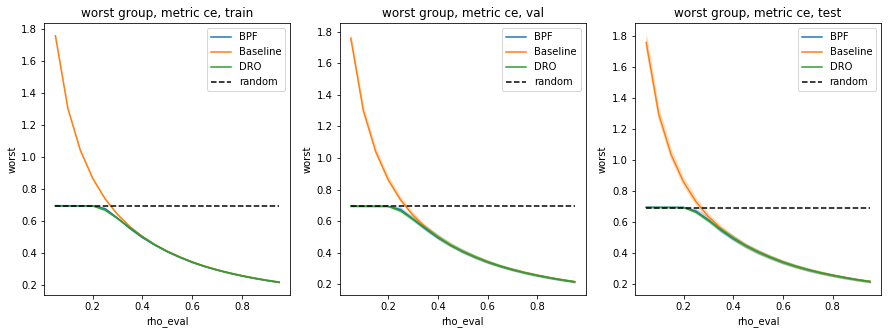

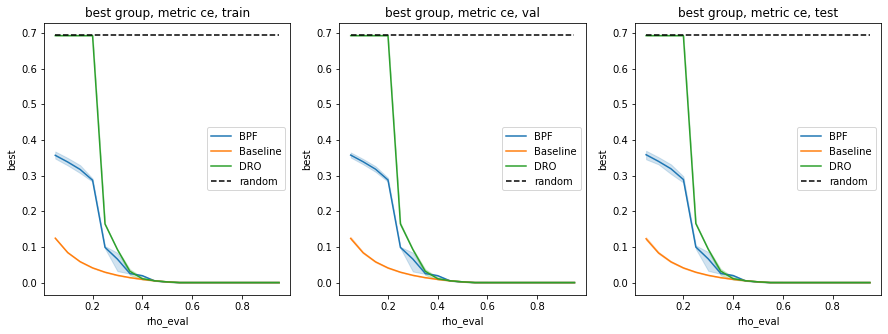



softerr


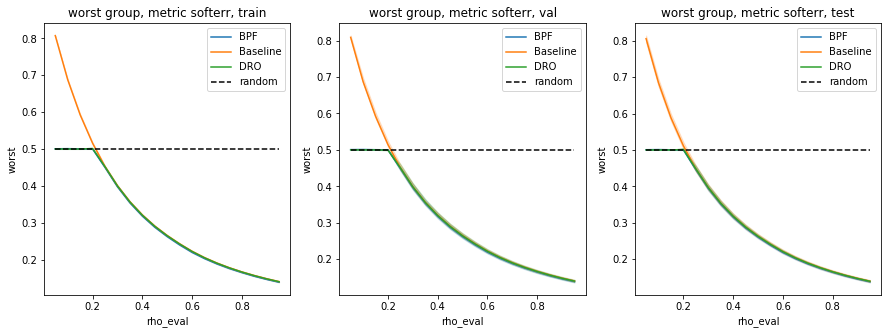

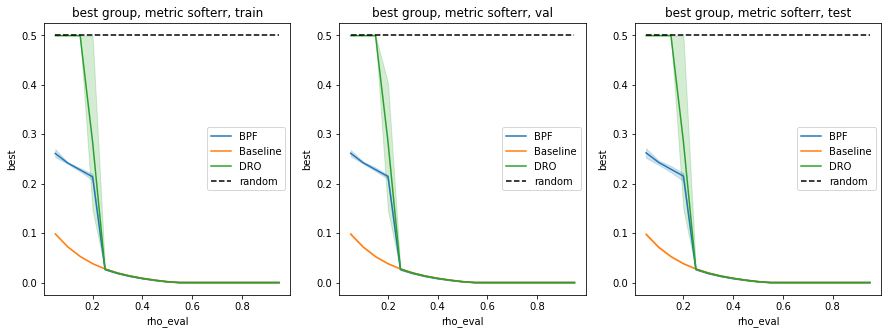

In [188]:
for metric in ['ce','softerr']:
    print(metric)
    for group in ['worst','best']:
        if (metric == 'softerr') | (metric == 'err'):
            value_random = 0.5
        else:
            value_random = np.log(2)
        plt.figure(figsize=(15,5))
        ix = 0
        for dataset in ['train','val','test']:
            pd_aux = pd_out.loc[(pd_out.metric == metric) & (pd_out.dataset == dataset)]
            ix += 1
            plt.subplot(1,3,ix)
            plt.title(group + ' group, metric '+metric + ', '+dataset)
            sns.lineplot(data = pd_aux, x = 'rho_eval',y=group,hue='model')
            plt.plot([pd_aux.rho_eval.min(),pd_aux.rho_eval.max()],
                     [value_random,value_random],'k--',label = 'random')
            plt.legend()
#             plt.yscale('log')
        plt.show()
    print()
    print()
    

<Figure size 576x576 with 0 Axes>

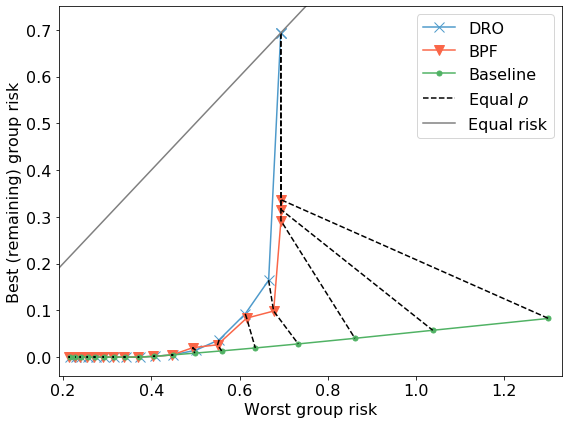

In [204]:
pd_plot = pd_out.loc[(pd_out.metric == 'ce') & (pd_out.dataset == 'train')& (pd_out.split == 1)].copy()
pd_plot = pd_plot.loc[(pd_plot.rho_eval != 0.15) & (pd_plot.rho_eval != 0.05)  ]
  
# drop these row indexes
# from dataFrame


pd_plot_DRO = pd_plot.loc[pd_plot.model == 'DRO']
pd_plot_BPF = pd_plot.loc[pd_plot.model == 'BPF']
pd_plot_Base = pd_plot.loc[pd_plot.model == 'Baseline']

from matplotlib import cm
plt.figure(figsize=(8,8))
# colors_list = np.linspace(125,255,rho_values_BPF.shape[0]).astype('int')
i= 0

plt.figure(figsize=(8,6))

x = pd_plot_DRO.worst.values
y = pd_plot_DRO.best.values
plt.plot(x, y, 'x-',color = cm.Blues(150), markersize=10,label = 'DRO')

x = pd_plot_BPF.worst.values
y = pd_plot_BPF.best.values
plt.plot(x, y, 'v-',color = cm.Reds(130), markersize=10,label = 'BPF')

x = pd_plot_Base.worst.values
y = pd_plot_Base.best.values
plt.plot(x, y, '.-',color = cm.Greens(150), markersize=10,label = 'Baseline')

rho_eval = pd_plot_DRO.rho_eval.unique()
for i in np.arange(rho_eval.shape[0]):
    rho = rho_eval[i]
    x = [pd_plot_DRO.loc[pd_plot_DRO.rho_eval.values == rho].worst.values[0],
         pd_plot_BPF.loc[pd_plot_BPF.rho_eval.values == rho].worst.values[0],
         pd_plot_Base.loc[pd_plot_Base.rho_eval.values == rho].worst.values[0]]
    
    y = [pd_plot_DRO.loc[pd_plot_DRO.rho_eval.values == rho].best.values[0],
         pd_plot_BPF.loc[pd_plot_BPF.rho_eval.values == rho].best.values[0],
         pd_plot_Base.loc[pd_plot_Base.rho_eval.values == rho].best.values[0]]
    
    if i ==0:
        plt.plot(x,y,'k--',label = r'Equal $\rho$')
    else:
        
        plt.plot(x,y,'k--')

plt.plot(np.linspace(0.03,0.8,100),np.linspace(0.03,0.8,100),color='grey', label = 'Equal risk')
plt.legend(fontsize = 16,)
plt.xlim([0.19,1.33])
plt.ylim([-0.04,0.75])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Worst group risk', fontsize=16)
plt.ylabel('Best (remaining) group risk', fontsize=16)
plt.tight_layout()
plt.savefig('fig1.png',dpi = 500)
plt.show()


